In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset = pd.read_csv("labeled_data.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [6]:
dataset["labels"]= dataset["class"].map({0:"Hate Speech",1:"Offensive Language",2:"neither"})
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",neither
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [7]:
data=dataset[["tweet","labels"]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [8]:

import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))
stemmer=nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def clean_data(text):
    text=str(text).lower()
    text=re.sub('https?://\S+|www\.S+', '',text)
    tect=re.sub('\[.*?\]', '',text)
    text=re.sub('<.*?>+', '',text)
    text=re.sub('[%s]' %re.escape(string.punctuation), '',text)
    text=re.sub('\n', '',text)
    text=re.sub('\w"\d\w"', '',text)
    text=[word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text= " ".join(text)
    return text  

In [10]:
data["tweet"]=data["tweet"].apply(clean_data)
data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13440\1939739276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,neither
1,rt mleew17 boy dat coldtyga dwn bad cuffin da...,Offensive Language
2,rt urkindofbrand dawg rt 80sbaby4lif ever fuc...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie 8220lifeask 20pearl coreyema...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,neither
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [11]:
x=np.array(data["tweet"])
y=np.array(data["labels"])
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt mleew17 boy dat coldtyga dwn bad cuffin dat hoe 1st place',
       ' rt urkindofbrand dawg rt 80sbaby4lif ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv=CountVectorizer()
x=cv.fit_transform(x)
x

<24783x33744 sparse matrix of type '<class 'numpy.int64'>'
	with 212089 stored elements in Compressed Sparse Row format>

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
x_train

<16604x33744 sparse matrix of type '<class 'numpy.int64'>'
	with 142205 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 152,  272,   41],
       [ 241, 5842,  252],
       [  37,  207, 1135]], dtype=int64)

<Axes: >

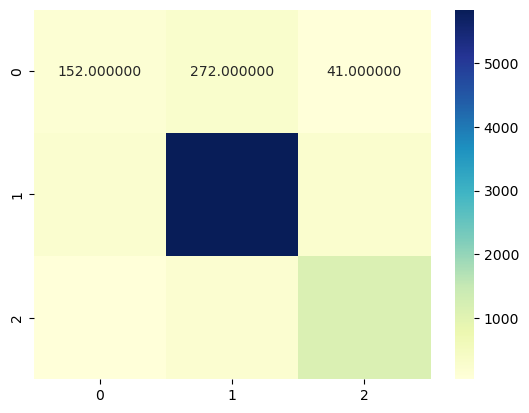

In [15]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline
sns.heatmap(cm,annot=True,fmt="f",cmap="YlGnBu")

In [17]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred,average="macro")
recall = recall_score(y_test, y_pred,average="macro")
f1 = f1_score(y_test, y_pred,average="macro")
accuracy=accuracy_score(y_test,y_pred)
# Print the results
print("Precision:", precision)
print("Accuracy:" ,accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6908423834650139
Accuracy: 0.8716224477319966
Recall: 0.6907067610282018
F1 Score: 0.6905186139102448


In [21]:
sample="Lets kill people"
sample=clean_data(sample)
sample
data1=cv.transform([sample])
dt.predict(data1)

array(['Offensive Language'], dtype=object)